# Computación Científica - Tarea 3
---
Vicente Lizana Estivill  
vlizana@alumnos.inf.utfsm.cl  
201310004-K

---

## Introducción
---



El objetivo de esta tarea es la familiarización con el álgebra matricial mediante la implementación del algoritmo _Principal Component Analisys_ utilizando _Single Value Descomposition_.

---

## Desarrollo y Análisis de Resultados
---

### Bibliotecas, Utilidades y Extracción de Datos
---

In [1]:
from PIL import Image
import numpy as np
import scipy as sp
import scipy.interpolate as itp
import pickle
import matplotlib.pyplot as plt
from ipywidgets import widgets
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def show_image(dataset,indices,mean,original,distance,im_size):
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
    ax1.imshow(np.reshape(original*255 + mean[None,:],im_size), cmap='gray')
    ax2.imshow(np.reshape(dataset[indices[0],]*255 + mean[None,:],im_size), cmap='gray')
    ax3.imshow(np.reshape(dataset[indices[1],]*255 + mean[None,:],im_size), cmap='gray')
    ax4.imshow(np.reshape(dataset[indices[2],]*255 + mean[None,:],im_size), cmap='gray')
    ax5.imshow(np.reshape(dataset[indices[3],]*255 + mean[None,:],im_size), cmap='gray')
    ax6.imshow(np.reshape(dataset[indices[4],]*255 + mean[None,:],im_size), cmap='gray')
    ax1.set_title('Original')
    ax2.set_title('distancia '+str(distance[0]))
    ax3.set_title('distancia '+str(distance[1]))
    ax4.set_title('distancia '+str(distance[2]))
    ax5.set_title('distancia '+str(distance[3]))
    ax6.set_title('distancia '+str(distance[4]))
    plt.show()

In [3]:
with open('pickle1.pkl', 'rb') as pickle1:
    dataset1 = np.asarray(pickle.load(pickle1)).reshape(88, -1) # 88 imagenes de 286x384
    
with open('pickle2.pkl', 'rb') as pickle2:
    dataset2 = np.asarray(pickle.load(pickle2)).reshape(4, -1) # 4  imagenes de 286x384

size = 286, 384

---

### Pregunta 1

Implementar el algoritmo PCA (Leer PDF adjunto) para proyectar los vectores de datos (imágenes en _pickle 1_) utilizando los 3 vectores asociados a los **valores singulares** que usted estime conveniente. ¿Por qué eligió esos vectores propios?

---

In [4]:
def the_best_pca(A, dimmensions, full=False, debug=False):
    U, sigma, V = np.linalg.svd(A, full_matrices=full)
    if debug:
        print(U.shape)
        print(sigma.shape)
        print(V.shape)
    return U[:,:dimmensions] @ np.diag(sigma[:dimmensions]), V[:dimmensions,:]

def the_best_inverse_pca(US, V, debug=False):
    if debug:
        print(US.shape)
        print(V.shape)
    return US @ V

Nuestro _PCA_ consiste en obtener la descomposición _SVD_, para luego retornar una multiplicación entre las matrices $U$ y $\Sigma$ truncadas por el número de componentes. También retornamos el $V^*$ para utilizarlo después.

El `np.linalg.svd` de numpy nos entrega los _singular values_ en orden descendente. Elegimos los vectores asociados a los primeros (mayores) ya que corresponden a las características o componentes más relevantes de cada imágen.

---

### Pregunta 2

* Utilizando las imágenes que están en el _pickle 2_, usted deberá encontrar los 5 vecinos más cercanos (esto quiere decir encontrar las 5 imágenes que estén a la menor norma **vectorial** euclidiana de nuestra imagen) para cada una de las imágenes utilizando los **vectores proyectados** obtenidos en la pregunta anterior. Usted deberá devolver los índices de las imágenes y las distancias ordenadas de menor a mayor, e ingresar estos números en la función que se encuentra a continuación. ¿Que puede decir acerca de los resultados? Concluya.

---

In [5]:
data = np.vstack((dataset1, dataset2))
mean = data.mean(axis=0)
working_set = (data - mean[None:]) /255
working_set1 = working_set[:88,:]
working_set2 = working_set[88:,:]

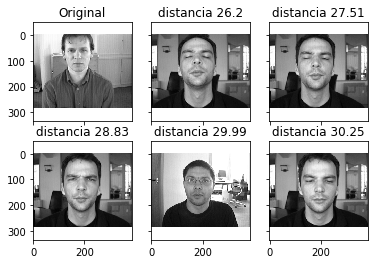

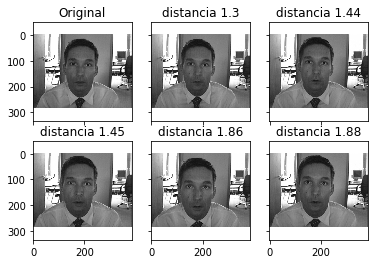

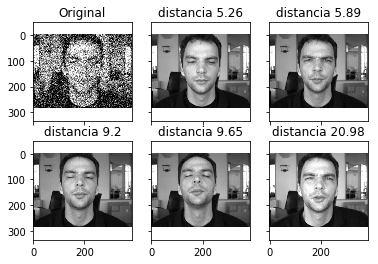

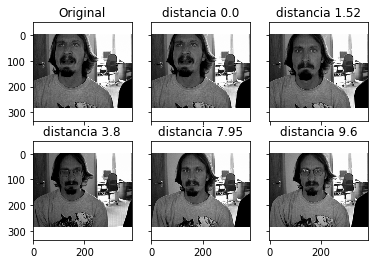

In [6]:
after_pca3, V3 = the_best_pca(working_set, 3)
pca3_ws1 = after_pca3[:88,:]
pca3_ws2 = after_pca3[88:,:]

pca3_idx = []
pca3_norm = []

for i in range(pca3_ws2.shape[0]):
    original = pca3_ws2[i]
    norm = np.linalg.norm(pca3_ws1 - original, axis=1)
    idx = norm.argsort()[:5]
    pca3_idx.append(idx)
    dist = norm[idx]
    pca3_norm.append(dist)
    show_image(working_set1, idx, mean, working_set2[i], np.round(dist, 2), size)

En los casos 2 y 4 se aprecia claramente que se encontraron las imágenes mas parecidas o cercanas. Incluso en el caso 3 se puede ver como a pesar del ruido se encuentran las imágenes correspondientes al mismo sujeto de prueba. En el caso 1 no habían imágenes del sujeto en el primer dataset, por lo que se puede ver que la distancia a las imágenes mas cercanas es bastante alta en todos los casos.

A partir de esto podemos concluir que en caso de que tengamos certeza de tener imágenes parecidas, bastan tres componentes para encontrarlas en un dataset.

---

* Reconstruir utilizando su data proyectada las 5 imágenes más cercanas encontradas en el ejercicio anterior. ¿Qué puede decir sobre estas imágenes? Concluya.

---

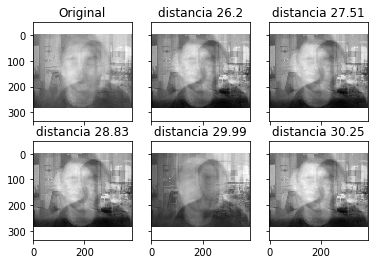

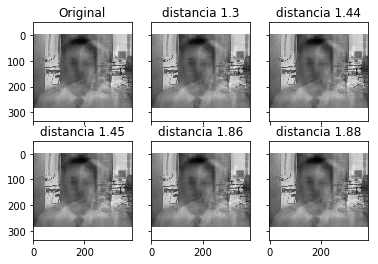

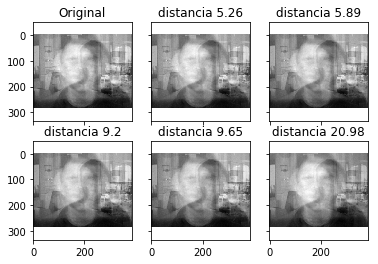

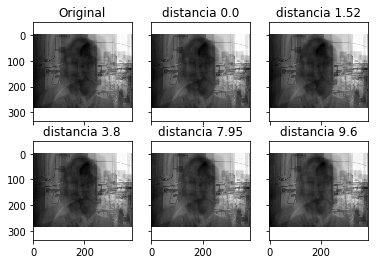

In [7]:
reconstructed_data3 = the_best_inverse_pca(after_pca3, V3)
reconstructed_ws1_3 = reconstructed_data3[:88,:]
reconstructed_ws2_3 = reconstructed_data3[88:,:]

for i in range(reconstructed_ws2_3.shape[0]):
    show_image(reconstructed_ws1_3, pca3_idx[i], mean, reconstructed_ws2_3[i], np.round(pca3_norm[i], 2), size)

Se aprecia una reconstrucción bastante pobre, en donde la media sacada anteriormente para cada pixel tiene un peso considerable en la imagen final, sin embargo se puede ver que las imágenes de mismo set se parecen bastante entre sí.

---

### Pregunta 3

Volver a realizar el desarrollo de la pregunta 2 pero esta vez utilizando 10 vectores propios.

---

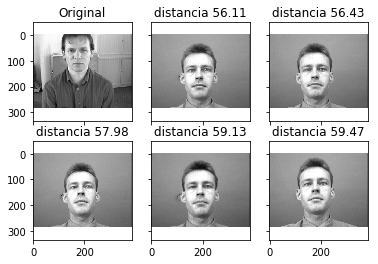

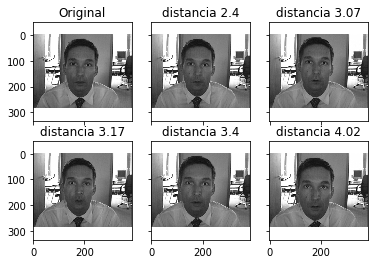

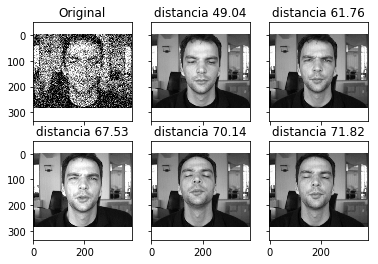

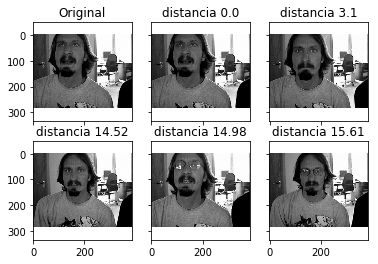

In [8]:
after_pca10, V10 = the_best_pca(working_set, 10)
pca10_ws1 = after_pca10[:88,:]
pca10_ws2 = after_pca10[88:,:]

pca10_idx = []
pca10_norm = []

for i in range(pca10_ws2.shape[0]):
    original = pca10_ws2[i]
    norm = np.linalg.norm(pca10_ws1 - original, axis=1)
    idx = norm.argsort()[:5]
    pca10_idx.append(idx)
    dist = norm[idx]
    pca10_norm.append(dist)
    show_image(working_set1, idx, mean, working_set2[i], np.round(dist, 2), size)

Podemos ver que todas las distancias son mas grandes, lo que podemos interpretar como consecuencia de utilizar más vectores ya que tenemos mayor presición.

Solo se aprecia un cambio significativo en el primer caso ya que en los otros habíamos encontrado imágenes bastante satisfactorias. Se puede ver en este caso que las imágenes son un poco más parecidas que las encontradas anteriormente.

---

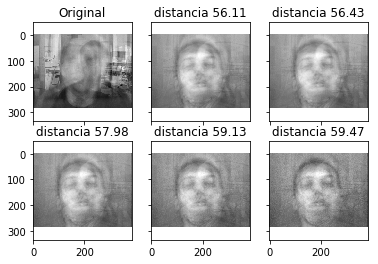

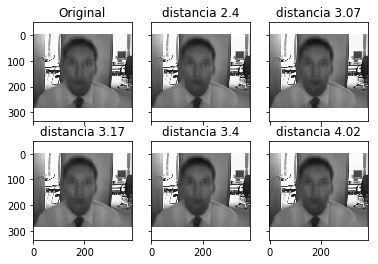

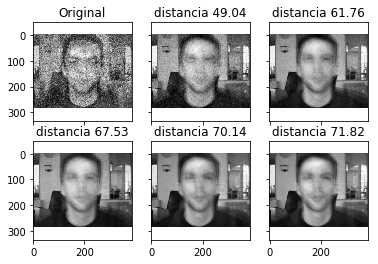

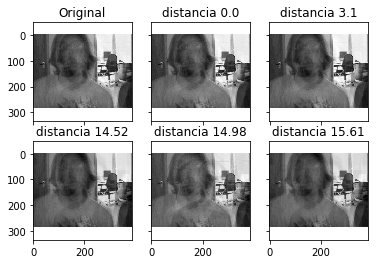

In [9]:
reconstructed_data10 = the_best_inverse_pca(after_pca10, V10)
reconstructed_ws1_10 = reconstructed_data10[:88,:]
reconstructed_ws2_10 = reconstructed_data10[88:,:]

for i in range(reconstructed_ws2_10.shape[0]):
    show_image(reconstructed_ws1_10, pca10_idx[i], mean, reconstructed_ws2_10[i], np.round(pca10_norm[i], 2), size)

Podemos ver reconstrucciones bastante mejores que en la pregunta anterior, excepto en el primer caso en donde la original y las imágenes cercanas no se parecían tanto.

Podemos también concluir que 10 vectores bastan para tener alguna idea de como se veía la imágen original a partir de la reconstrucción.

---

### Pregunta 4

Utilizando las imágenes reconstruidas de la pregunta 2 y 3, calcular la norma del error entre las imágenes originales y las reconstruidas, utilizando la norma 2. ¿Existe alguna relación entre la norma euclideana obtenida anteriormente con la norma matricial obtenida acá? ¿Afecta la cantidad de vectores **singulares** utilizados? Concluya usando sus gráficos.

---

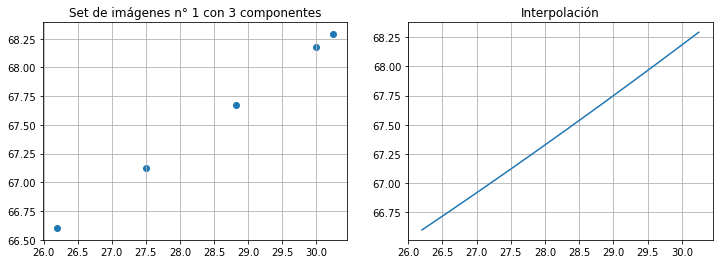

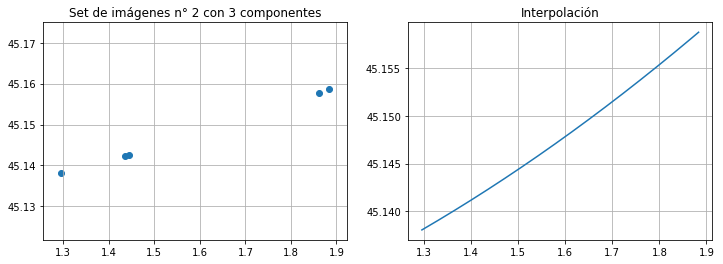

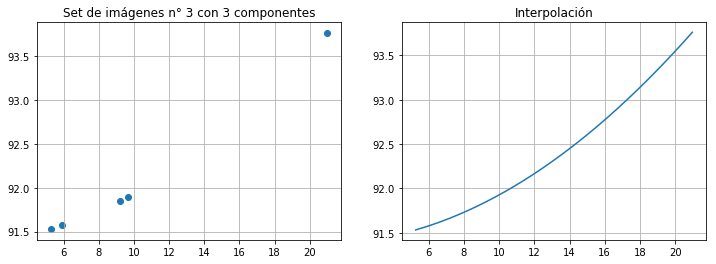

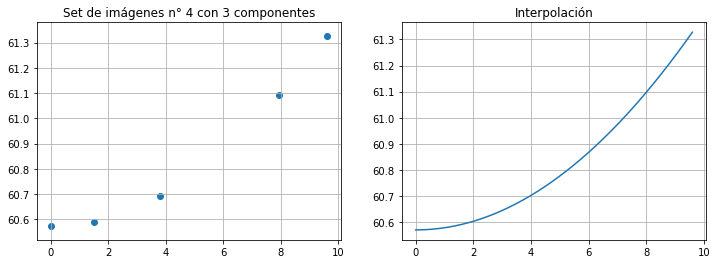

In [10]:
for i in range(working_set2.shape[0]):
    error = (reconstructed_ws1_3[pca3_idx[i]] - working_set2[i]).reshape(5, size[0], size[1])
    error_norm = np.linalg.norm(error, axis=(1,2))
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title('Set de imágenes n° {0} con 3 componentes'.format(i+1))
    plt.scatter(pca3_norm[i], error_norm)
    plt.grid()
    
    f = itp.interp1d(pca3_norm[i], error_norm, 'cubic')
    x = np.linspace(min(pca3_norm[i]), max(pca3_norm[i]), 1000)
    plt.subplot(122)
    plt.title('Interpolación')
    plt.plot(x, f(x))
    plt.grid()
    plt.show()

---

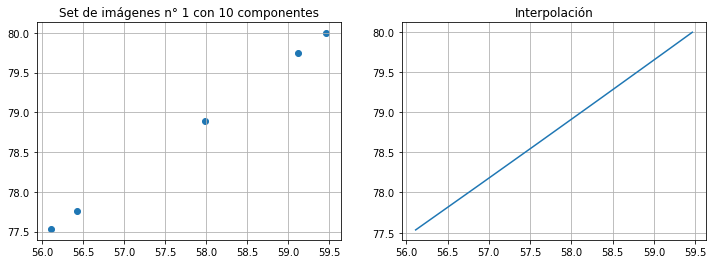

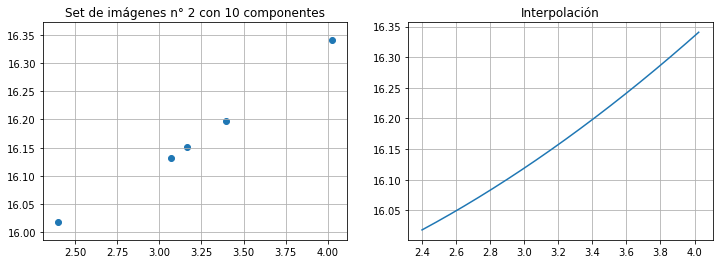

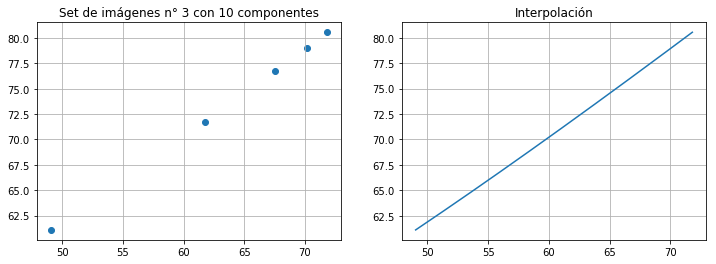

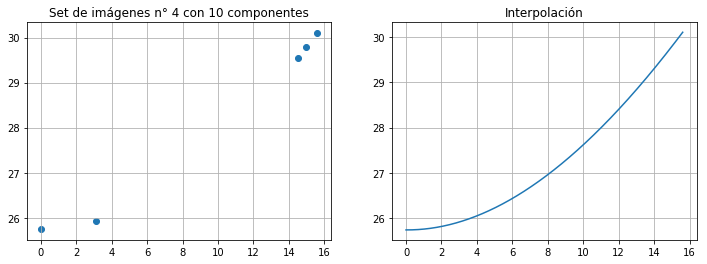

In [11]:
for i in range(working_set2.shape[0]):
    error = (reconstructed_ws1_10[pca10_idx[i]] - working_set2[i]).reshape(5, size[0], size[1])
    error_norm = np.linalg.norm(error, axis=(1,2))
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title('Set de imágenes n° {0} con 10 componentes'.format(i+1))
    plt.scatter(pca10_norm[i], error_norm)
    plt.grid()
    
    f = itp.interp1d(pca10_norm[i], error_norm, 'cubic')
    x = np.linspace(min(pca10_norm[i]), max(pca10_norm[i]), 1000)
    plt.subplot(122)
    plt.title('Interpolación')
    plt.plot(x, f(x))
    plt.grid()
    plt.show()

---

Se puede ver que a mayor distancia el comportamiento es más lineal, en el último caso como las imágenes son muy cercanas se aprecia un comportamiento más cuadrático cerca del 0.

También se puede ver que con mayor cantidad de componentes el comportamiento es más lineal, gracias a que se tiene mayor cantidad de información.

---

## Conclusiones
---

En este trabajo pudimos comprender como proyectar información representada en una alta dimensionalidad a otra dimensión más baja para poder reducir los tiempos de computación en labores como la comparación de imágenes, mediante la implementación del algoritmo _PCA_. También pudimos percibir las diferencias de utilizar distinta cantidad de componentes y analizar el _trade off_ que se nos presentaría a la hora de tomar una desición acerca de la cantidad de componentes a utilizar. 

---

## Referencias
---

[Documentación de Numpy](http://www.numpy.org/)  
[Documentación de SciPy](https://www.scipy.org/)  
[Documentación de Matplotlib](http://matplotlib.org)